### **Class distribution**

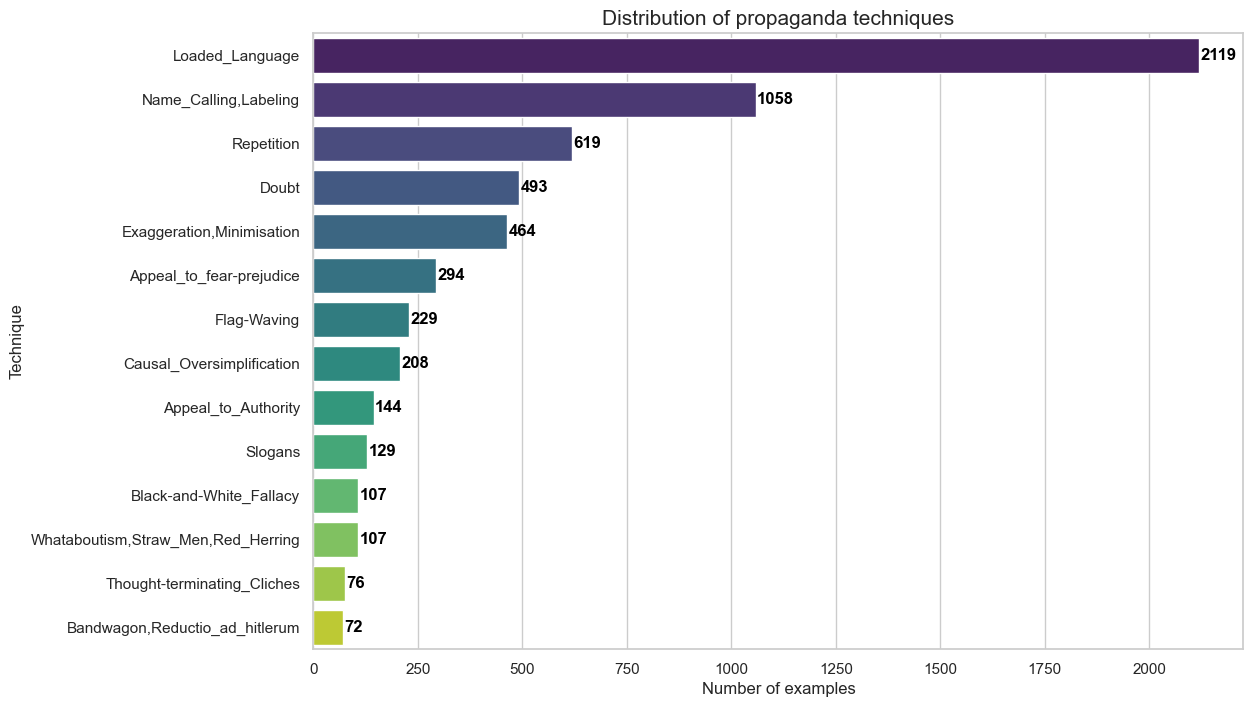

--- Percentage distribution of classes ---
label
Loaded_Language                       34.629841
Name_Calling,Labeling                 17.290407
Repetition                            10.116032
Doubt                                  8.056872
Exaggeration,Minimisation              7.582938
Appeal_to_fear-prejudice               4.804707
Flag-Waving                            3.742442
Causal_Oversimplification              3.399248
Appeal_to_Authority                    2.353326
Slogans                                2.108188
Black-and-White_Fallacy                1.748652
Whataboutism,Straw_Men,Red_Herring     1.748652
Thought-terminating_Cliches            1.242033
Bandwagon,Reductio_ad_hitlerum         1.176663
Name: proportion, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = os.path.join('..', 'data', 'processed', 'dataset.csv')
df = pd.read_csv(path)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

class_counts = df['label'].value_counts()

ax = sns.barplot(x=class_counts.values, y=class_counts.index, hue=class_counts.index, palette="viridis", legend=False)

for i, v in enumerate(class_counts.values):
    ax.text(v + 3, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Distribution of propaganda techniques', fontsize=15)
plt.xlabel('Number of examples', fontsize=12)
plt.ylabel('Technique', fontsize=12)
plt.show()

print("--- Percentage distribution of classes ---")
print(df['label'].value_counts(normalize=True) * 100)

### **Length and counts**

In [3]:
import plotly.express as px

df['context_words'] = df['context'].apply(lambda x: len(str(x).split()))
df['fragment_words'] = df['fragment'].apply(lambda x: len(str(x).split()))

fig = px.histogram(
    df, 
    x="context_words", 
    nbins=50,
    title='Sentence length distribution',
    labels={'context_words': 'Number of words', 'count': 'Number of sentences'},
    color_discrete_sequence=['skyblue'],
    marginal="box" 
)

fig.update_layout(
    bargap=0.1,
    xaxis_title="Number of words in a sentence",
    yaxis_title="Number of examples in the dataset"
)

fig.show()

In [4]:
import plotly.express as px

df['context_words'] = df['context'].apply(lambda x: len(str(x).split()))
df['fragment_words'] = df['fragment'].apply(lambda x: len(str(x).split()))

fig = px.histogram(
    df, 
    x="fragment_words", 
    nbins=50,
    title='Fragment length distribution',
    labels={'fragment_words': 'Number of words', 'count': 'Number of fragments'},
    color_discrete_sequence=['skyblue'],
    marginal="box" 
)

fig.update_layout(
    bargap=0.1,
    xaxis_title="Number of words in a fragments",
    yaxis_title="Number of examples in the dataset"
)

fig.show()

In [5]:
df['frag_words'] = df['fragment'].apply(lambda x: len(str(x).split()))
    
stats = df.groupby('label')['frag_words'].agg(['mean', 'median', 'min', 'max']).sort_values('mean')
    
print("📊 Average fragment length (in words) by class:")
print(stats)

📊 Average fragment length (in words) by class:
                                         mean  median  min  max
label                                                          
Repetition                           2.815832     2.0    1   31
Loaded_Language                      3.822558     3.0    1   90
Name_Calling,Labeling                3.932892     3.0    1   28
Slogans                              4.325581     4.0    1   15
Thought-terminating_Cliches          6.131579     5.0    1   20
Exaggeration,Minimisation            7.441810     6.0    1   43
Flag-Waving                         10.628821     6.0    1   73
Whataboutism,Straw_Men,Red_Herring  16.401869    15.0    1   71
Bandwagon,Reductio_ad_hitlerum      16.444444    13.0    2   60
Appeal_to_fear-prejudice            17.047619    13.5    1   74
Black-and-White_Fallacy             18.710280    16.0    2   58
Doubt                               21.144016    17.0    1  141
Causal_Oversimplification           21.538462    19.0    

In [6]:
dupes = df.duplicated().sum()
print(f"Duplicates found: {dupes}")

Duplicates found: 0


In [7]:
missing_in_context = df[~df.apply(lambda x: x['fragment'] in x['context'], axis=1)]
print(f"Fragments NOT found in context: {len(missing_in_context)}")
print(missing_in_context.head())

Fragments NOT found in context: 0
Empty DataFrame
Columns: [article_id, fragment, context, label, context_words, fragment_words, frag_words]
Index: []


In [8]:
print("Context length statistics (words):")
print(df['context_words'].describe())

print("\nFragment length statistics (words):")
print(df['fragment_words'].describe())

Context length statistics (words):
count    6119.000000
mean       33.096421
std        17.947724
min         3.000000
25%        21.000000
50%        30.000000
75%        42.000000
max       144.000000
Name: context_words, dtype: float64

Fragment length statistics (words):
count    6119.000000
mean        8.026311
std        10.788486
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max       141.000000
Name: fragment_words, dtype: float64


In [9]:
long_sentences = df[df['context_words'] > 100]

print(f"{len(long_sentences)} abnormally long sentences found.\n")

for i, row in long_sentences.head(3).iterrows():
    print(f"Article ID: {row['article_id']}")
    print(f"Length: {row['context_words']} words")
    print(f"Context text: {row['context'][:500]}...")
    print("-" * 50)

31 abnormally long sentences found.

Article ID: article712382330
Length: 115 words
Context text: Concerning these guidelines that allow "the possibility of access to the sacraments of Reconciliation and the Eucharist" in "complex circumstances" where "limitations that lessen the responsibility and guilt" permit adulterous couples to continue in adultery, the pope said in his letter: <E> "The document is very good and completely explains the meaning of chapter VIII of Amoris Laetitia. There are no other interpretations." </E> Until now, the pope's letter to the Argentinian bishops had been c...
--------------------------------------------------
Article ID: article722512241
Length: 104 words
Context text: The signers, however, are not dissuaded in their pursuit of a paternal answer: You do not like to beat around the bush, and neither do we, so allow us to say frankly that we do not understand your teaching about Islam, as we read in paragraphs 252 and 253 of Evangelii Gaudium, because 

### **N-gram Analysis**

#### **Bigram Analysis**

In [10]:
import sys
import os
import wandb 
import pandas as pd

current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)

if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils import analyze_ngrams

analyze_ngrams(df, n=2, top_k=15)

#### **Trigram Analysis**

In [11]:
analyze_ngrams(df, n=3, top_k=15)

### **Correlation of Techniques**

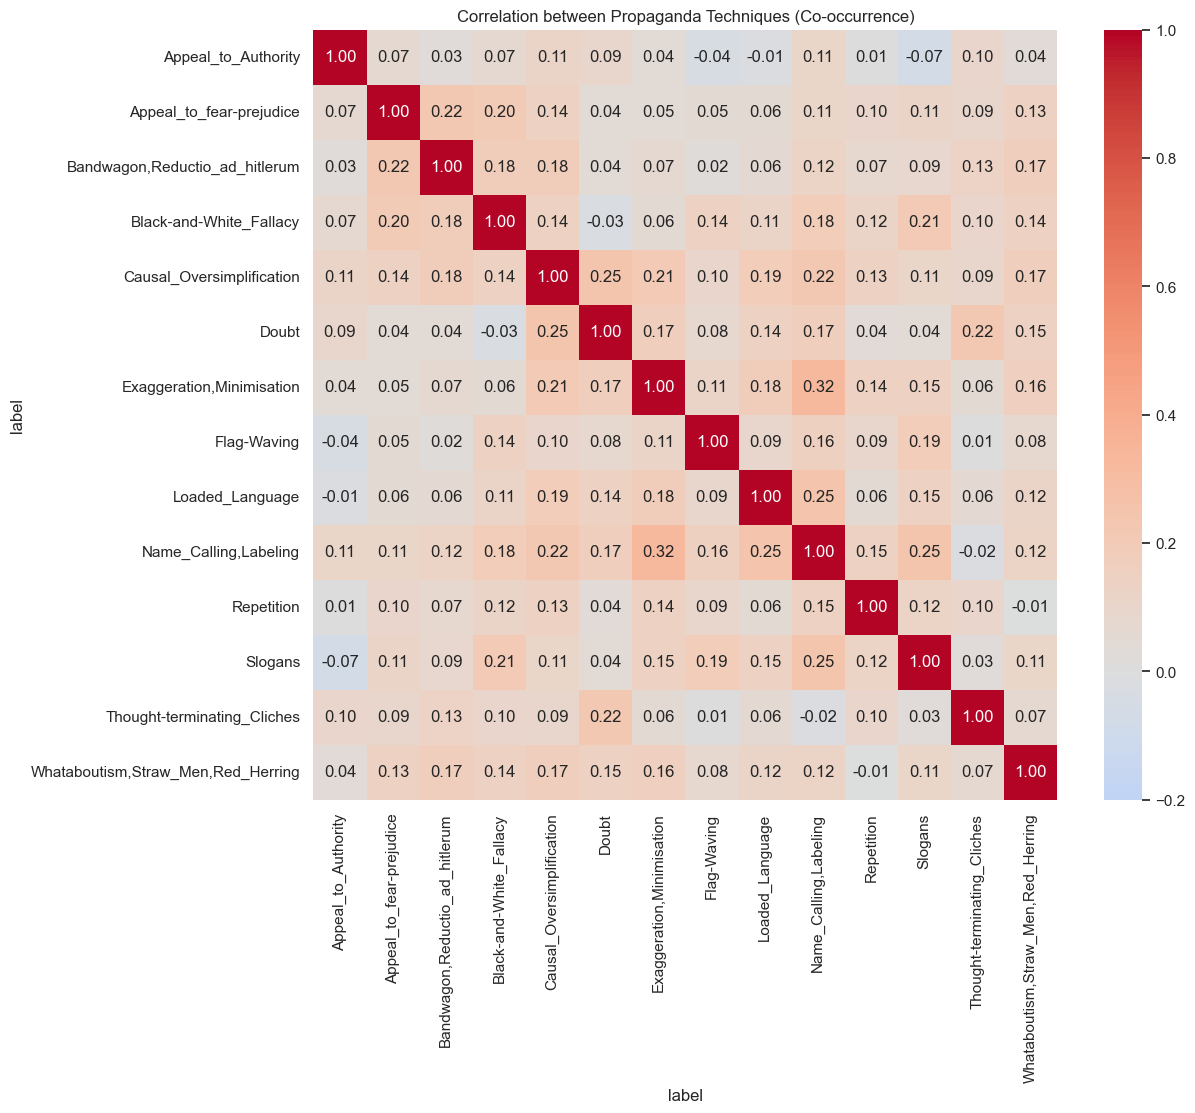

In [12]:
matrix = pd.crosstab(df['article_id'], df['label'])
    
matrix = (matrix > 0).astype(int)
    
corr_matrix = matrix.corr()
    
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    vmin=-0.2, 
    vmax=1.0,
    center=0
)
plt.title("Correlation between Propaganda Techniques (Co-occurrence)")
plt.show()